# About timeline_viz.ipynb

This notebook uses the functions defined and demontrasted in *utils_timeline_viz.ipynb* to clean log data and visualize it.
This is a work in progress :)

In [1]:
exec(open('load_utils.py').read())
from utils_timeline_viz import *

importing notebook from utils_timeline_viz.ipynb
importing function: find_student_log_file
importing function: remove_model_events
importing function: calculate_duration
importing function: prep_parsing_data
importing function: add_family
importing function: get_blocks_withTime
importing function: plot_barGraph_new
importing function: family_usage
importing function: plot


In [2]:
studentid = '90447168'
sim = 'beers'
# parsed_file = find_student_log_file(FOLDER,sim,studentid)
parsed_file = 'dream_table_beers-law-lab_90447168_2017-01-17_11.22.45.txt'
df = prep_parsing_data(parsed_file)

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
studentid = '83459165'
sim = 'beers'
# parsed_file = find_student_log_file(FOLDER,sim,studentid)
parsed_file = 'dream_table_beers-law-lab_83459165_2017-01-13_14.26.08.txt'
df2 = prep_parsing_data(parsed_file)

In [4]:
df.head(5)

,User,Sim,Time,Index,User or Model,Component,Event,Item,Action,Laser on status,Wavelength,Width,Concentration,Absorption,Detector location,Ruler location,diff in parsed table,Table,X axis,Y axis,X axis scale,Y axis scale,Experiment #s included,Notes,Timeshifted,Duration,Family
0,90447168,beers-law-lab,3.06,572,user,sim,toggle laser,laser button,NaN,False,780.0,1.00,0.1,NaN,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,5.54,2.48,Vl
1,90447168,beers-law-lab,5.54,1131,user,sim,dragStarted,cuvetteNode,NaN,True,780.0,1.00,0.1,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,5.59,0.05,Vc
2,90447168,beers-law-lab,5.59,1136,user,sim,dragged,cuvetteNode,increasing,True,780.0,1.00,0.1,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,5.66,0.07,Vc
3,90447168,beers-law-lab,5.66,1145,user,sim,dragged,cuvetteNode,increasing,True,780.0,1.01,0.1,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,5.68,0.02,Vc
4,90447168,beers-law-lab,5.68,1148,user,sim,dragged,cuvetteNode,increasing,True,780.0,1.01,0.1,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,5.72,0.04,Vc


In [13]:
def family_usage(df,column,regex):
    '''Given a regex, we detect its use using a particular column
    and then extract a list of time coordinates for when
    they were used. These coordinates are in the format (start_time, duration)
    
    Args:
        df (Pandas dataframe): The dataframe to search in.
        column (str): The column where the action regex might be logged (usualy the Family column)
        regex (str): The regex or often the name of the action family to search for in the column.    

    Returns:
        A list of tuples with start times of the regex and it's duration [(start1,duration1),(start2,duration2),...]
    '''
    if df[column].isnull().values.all():
        return [(0,0)]
    else:
        timecoords = zip(df[df[column].str.contains(regex,na=False)]['Time'],df[df[column].str.contains(regex,na=False)]['Duration'])
        return clean_coords(timecoords)

In [14]:
def axis_absorbance_usage(df):
    x_axis_usage = family_usage(df,'X axis','absorbance')
    y_axis_usage = family_usage(df,'Y axis','absorbance')
    print 'y',y_axis_usage
    return y_axis_usage

In [15]:
family_name_to_code = {'Interface':'I',
                        'Pause':'P',
                        'Graph (add/del/edit)':'G',
                        'Data Table (del/move)':'Dt',
                        'Notes':'N',
                        'Record':'M',
                        'Detector':'Vd',
                        'Wavelength':'Vw',
                        'Width':'Vc',
                        'Concentration':'Vs',
                        'Laser toggle':'Vl',
                        }

function_to_use = {'Axis- absorbance':axis_absorbance_usage}

to_plot = ['Interface','Notes','Pause','Axis- absorbance','Graph (add/del/edit)','Data Table (del/move)','Record','Detector','Wavelength','Width','Concentration','Laser toggle']

In [16]:
def plot(df,to_plot,family_name_to_code,function_to_use):
    ax = plt.subplot()
    spacing = 10
    margin = 1
    max_time = 0
    colors = sns.color_palette("hls", len(to_plot))
    
    for i,action in enumerate(to_plot):
        if action in family_name_to_code.keys():
            action_use = family_usage(df,'Family',family_name_to_code[action])
            action_use = clean_coords(action_use)
        else:
            action_use = function_to_use[action](df)
        if action_use:
            if action in ['Pause','Notes','Record']:
                    ax.broken_barh(action_use,(i*spacing,(spacing)*(len(to_plot)-i)),facecolors=colors[i],linewidth=0.5,edgecolor='k',alpha=0.4)
            max_time = max(max_time,sum(action_use[-1]))
            ax.broken_barh(action_use,(i*spacing,(spacing-margin)),facecolors=colors[i],alpha=1,linewidth=0.5,edgecolor='k')

    #Shape plot
    ax.set_ylim(-2, len(to_plot)*spacing+2)
    ax.set_xlim(0, max_time+2)
    
    #Add labels
    ax.set_xlabel('Time (min)',fontsize=25)
    ax.set_xticks(range(0,int(max_time),60))
    ax.set_xticklabels([str(x/60)+''if x in range(0,int(max_time),60*5) else "" for x in range(0,int(max_time),60)],fontsize=13)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.set_yticks(range(spacing/2,len(to_plot)*spacing,spacing))
    ax.set_yticklabels([a.capitalize() for a in to_plot],fontsize=25)
    ax.grid(True)

y [(243.0, 755.40999999999997)]


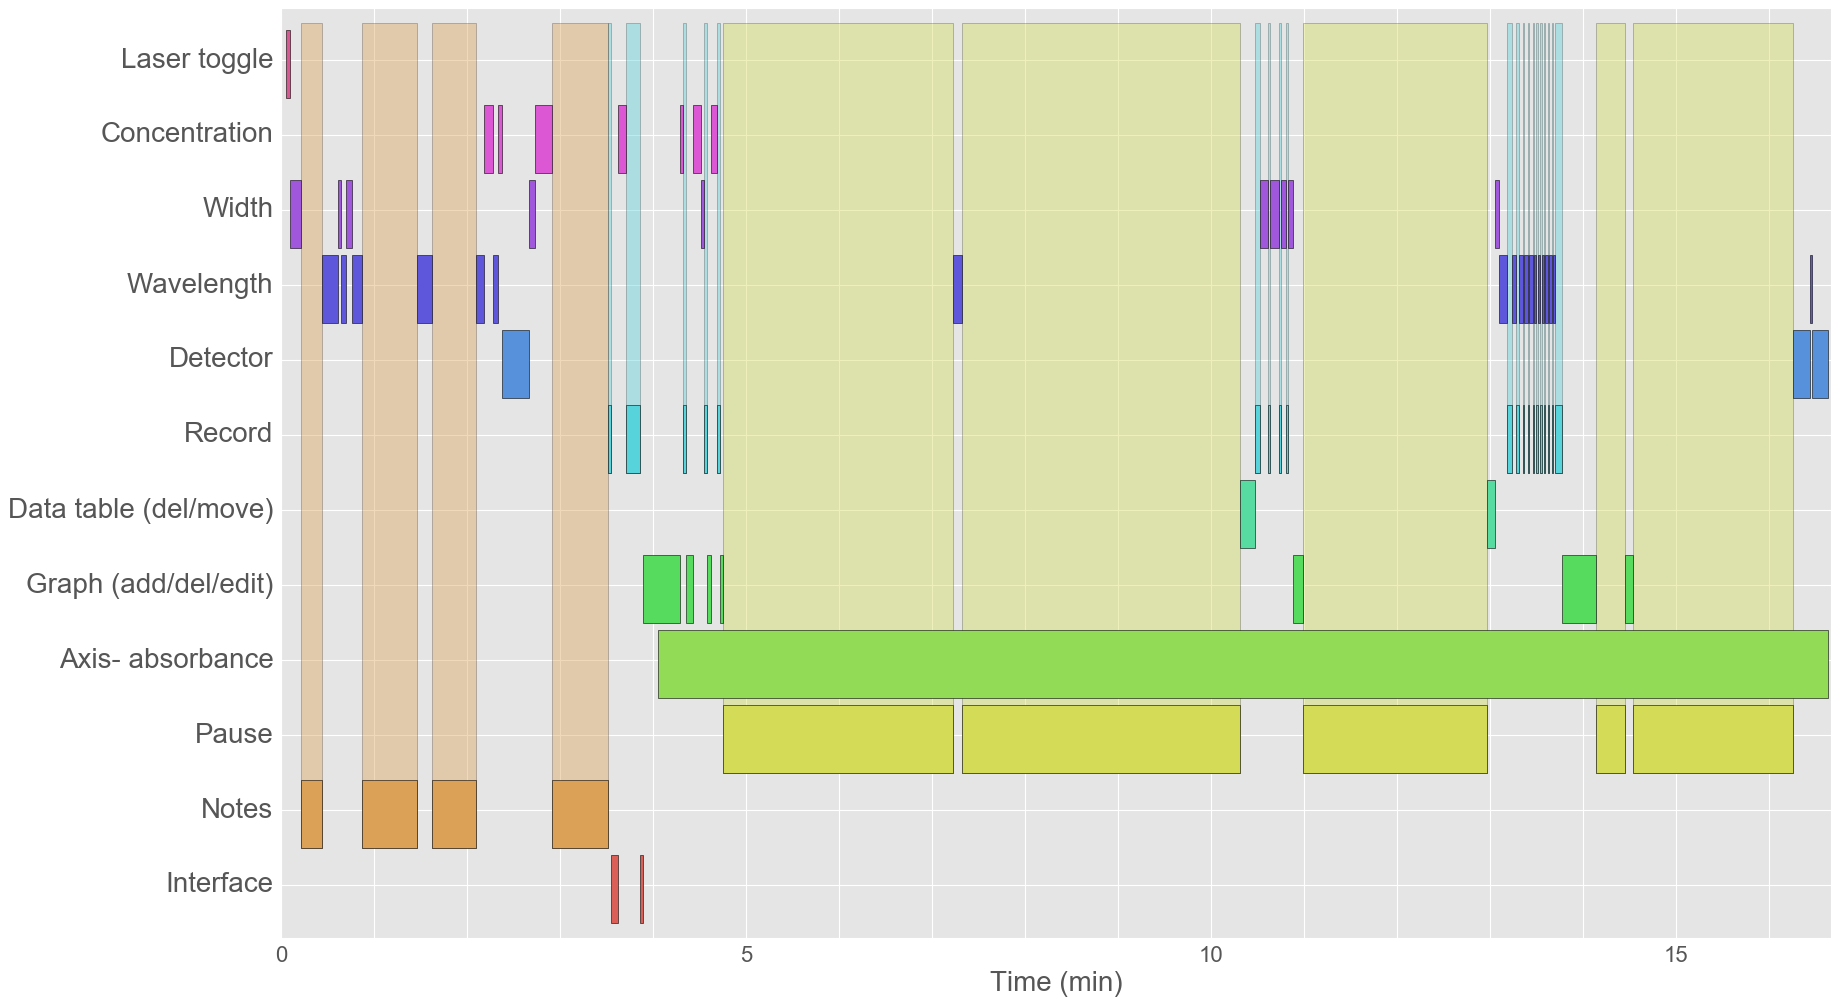

In [17]:
df['Duration'] = df['Duration'].fillna(2)
plot(df,to_plot,family_name_to_code,function_to_use)

y [(0, 0)]


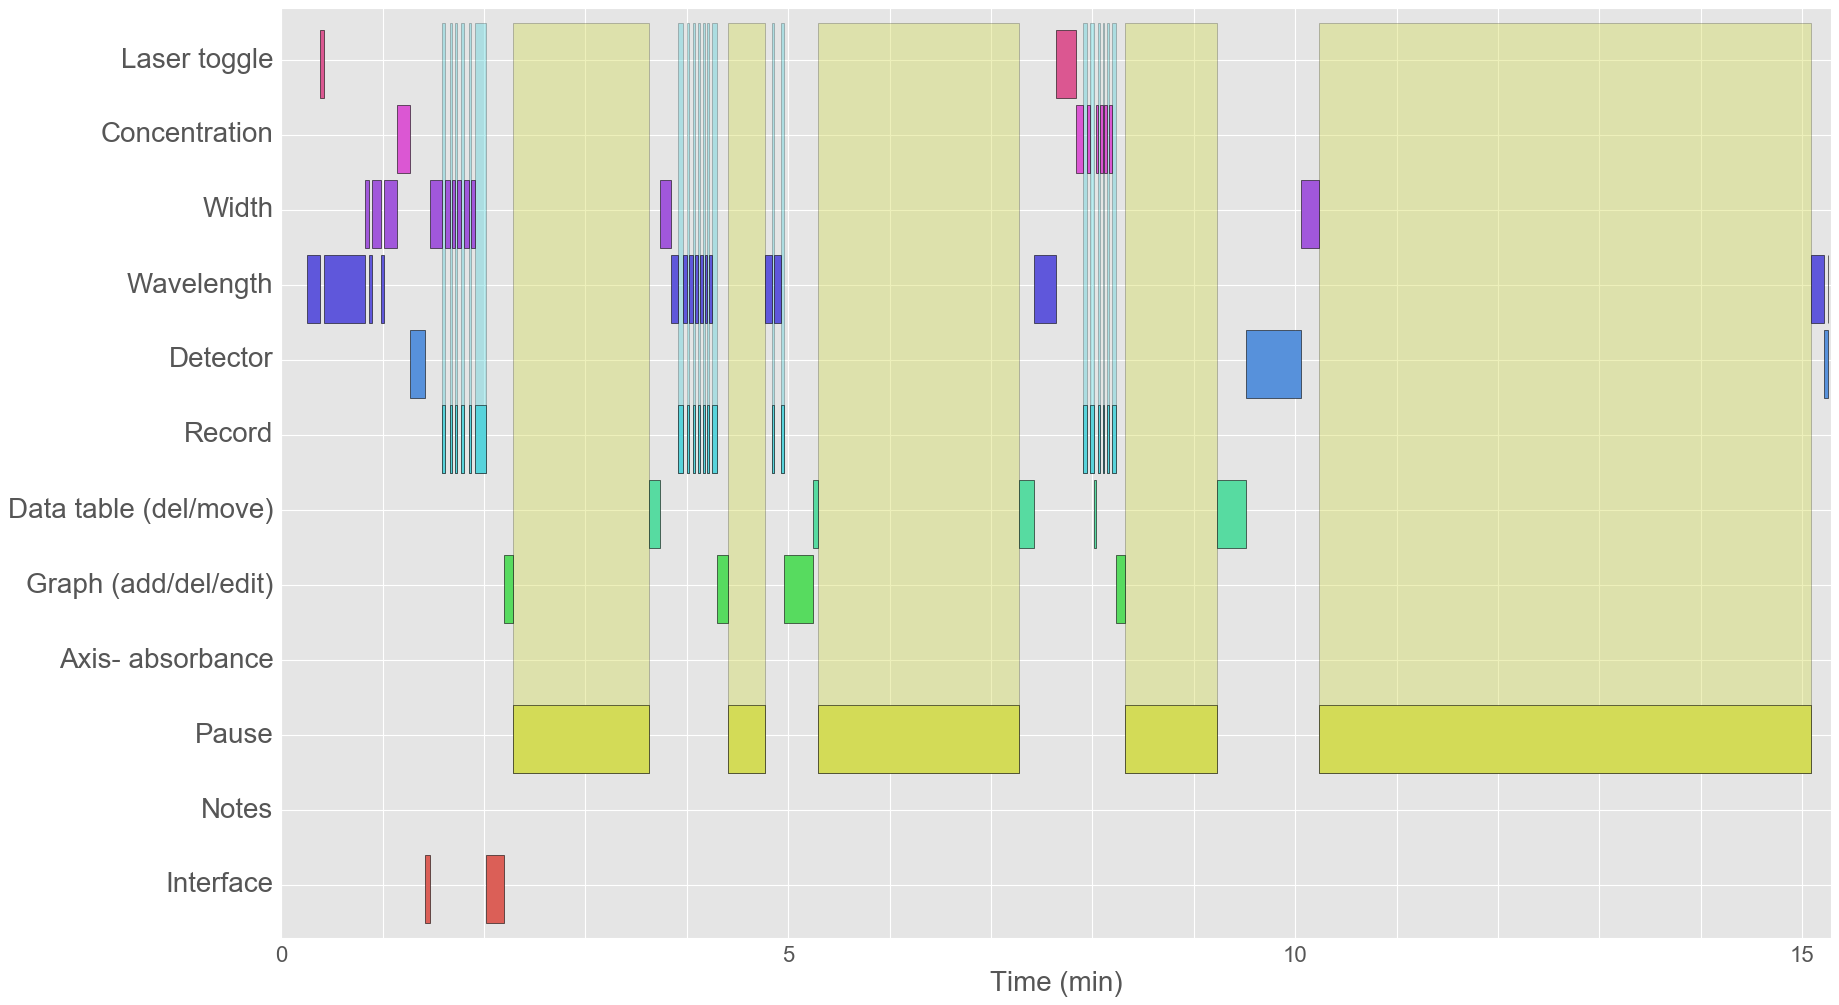

In [10]:
plot(df2,to_plot,family_name_to_code,function_to_use)

In [11]:
df['Timeshifted'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
14      False
13      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
43      False
42      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
58      False
57      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    